In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('results/experiment_results_20250123_063921.csv')
df.head()

,run_id,accuracy,time,pruning_method,dataset_size,selection_strategy,apply_pca,k,n_closest,n_furthest,num_epochs,batch_size,learning_rate,experiment_id
0,1,90.51,3.582634,random,600,NaN,False,1,1,1,5,64,0.001,1
1,1,84.29,4.265197,cluster,600,closest,False,50,1,1,5,64,0.001,2
2,1,66.87,4.226172,cluster,600,furthest,False,50,1,1,5,64,0.001,3
3,1,90.31,4.701893,cluster,600,random,False,50,1,1,5,64,0.001,4
4,1,90.34,8.740841,cluster,3000,closest,False,50,1,1,5,64,0.001,5


In [12]:
# Aggregate results
group_cols = [
    "pruning_method",
    "dataset_size",
    "selection_strategy",
    "apply_pca",
    "k",
    "n_closest",
    "n_furthest",
]
agg_results = (
    df.groupby(group_cols)
    .agg(
        median_accuracy=("accuracy", "median"),
        median_time=("time", "median"),
        count_runs=("run_id", "count"),
    )
    .reset_index()
)
agg_results.head(20)

,pruning_method,dataset_size,selection_strategy,apply_pca,k,n_closest,n_furthest,median_accuracy,median_time,count_runs
0,cluster,600,closest,False,50,1,1,84.29,4.265197,1
1,cluster,600,closest,True,50,1,1,87.38,3.998766,1
2,cluster,600,furthest,False,50,1,1,66.87,4.226172,1
3,cluster,600,furthest,True,50,1,1,57.43,3.999376,1
4,cluster,600,random,False,50,1,1,90.31,4.701893,1
5,cluster,600,random,True,50,1,1,89.52,3.994988,1
6,cluster,3000,closest,False,50,1,1,90.34,8.740841,1
7,cluster,3000,closest,True,50,1,1,91.25,7.790495,1
8,cluster,3000,furthest,False,50,1,1,96.17,8.110347,1
9,cluster,3000,furthest,True,50,1,1,96.14,7.279943,1


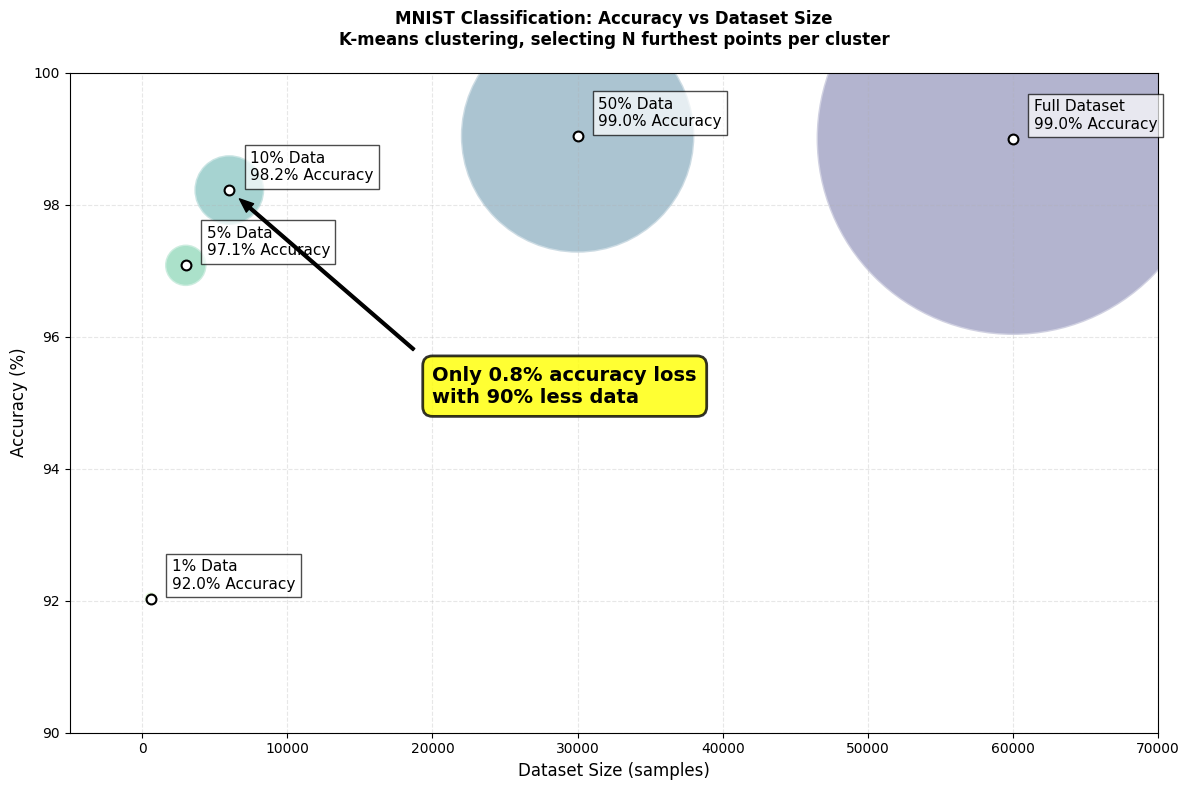

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_headline_bubble_plot():
    # Select best results for key sizes
    key_results = [
        {'size': 60000, 'accuracy': 99.0, 'label': 'Full Dataset'},
        {'size': 30000, 'accuracy': 99.04, 'label': '50% Data'},
        {'size': 6000, 'accuracy': 98.22, 'label': '10% Data'},
        {'size': 3000, 'accuracy': 97.08, 'label': '5% Data'},
        {'size': 600, 'accuracy': 92.03, 'label': '1% Data'}
    ]
    
    results_df = pd.DataFrame(key_results)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Create color gradient
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(results_df)))
    
    # Calculate bubble sizes - make them more dramatic
    # Use exponential scaling to make the differences more pronounced
    sizes = (results_df['size'] / 600) ** 1.5 * 80  # Increased multiplier for larger bubbles
    
    # Create the bubbles
    scatter = plt.scatter(results_df['size'], 
                         results_df['accuracy'],
                         s=sizes,
                         c=colors,
                         alpha=0.4,
                         edgecolor='white',
                         linewidth=2)
    
    # Add center points
    plt.scatter(results_df['size'],
               results_df['accuracy'],
               c='white',
               s=50,  # Increased size of center points
               zorder=3,
               edgecolor='black',
               linewidth=1.5)
    
    # Add labels for each bubble
    for idx, row in results_df.iterrows():
        plt.annotate(f"{row['label']}\n{row['accuracy']:.1f}% Accuracy",
                    (row['size'], row['accuracy']),
                    xytext=(15, 5),  # Adjusted offset
                    textcoords='offset points',
                    ha='left',
                    va='bottom',
                    fontsize=11,
                    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
    
    # Customize the plot
    plt.xlabel('Dataset Size (samples)', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    main_title = 'MNIST Classification: Accuracy vs Dataset Size'
    subtitle = 'K-means clustering, selecting N furthest points per cluster'
    plt.title(f'{main_title}\n{subtitle}', 
                  pad=20,
                  fontsize=12,
                  fontdict={'fontsize': 14, 
                           'fontweight': 'bold'})
    # plt.title('MNIST Classification: Accuracy vs Dataset Size',fontsize=14, pad=20)
    # plt.title('MNIST Classification: Accuracy vs Dataset Size\nAchieving 98.2% accuracy with just 10% of the data', 
    #           fontsize=14, pad=20)
    
    # Set axis ranges with a bit more space for bubbles
    plt.xlim(-5000, 70000)
    plt.ylim(90, 100)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Add an annotation highlighting the efficiency
    plt.annotate('Only 0.8% accuracy loss\nwith 90% less data',
                    xy=(6000, 98.22),  # Point to 10% data point
                    xytext=(20000, 95),  # Text position
                    arrowprops=dict(
                        facecolor='black',
                        shrink=0.05,
                        width=2,
                        headwidth=8,
                        headlength=10
                    ),
                    bbox=dict(
                        facecolor='yellow',
                        edgecolor='black',
                        alpha=0.8,
                        boxstyle='round,pad=0.5',
                        linewidth=2
                    ),
                    fontsize=14,
                    fontweight='bold')
    
    
    plt.tight_layout()
    return plt.gcf()

# Usage:
figure = create_headline_bubble_plot()
plt.show()
# figure.savefig('mnist_efficiency.png', dpi=300, bbox_inches='tight', facecolor='white')

/var/folders/df/nf3r4lm93rbf2zr46sdq3mkc0000gp/T/ipykernel_27756/637308411.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{size}\n({size/60000*100:.1f}%)' for size in sorted(results['dataset_size'].unique())])
/var/folders/df/nf3r4lm93rbf2zr46sdq3mkc0000gp/T/ipykernel_27756/637308411.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{size}\n({size/60000*100:.1f}%)' for size in sorted(results['dataset_size'].unique())])


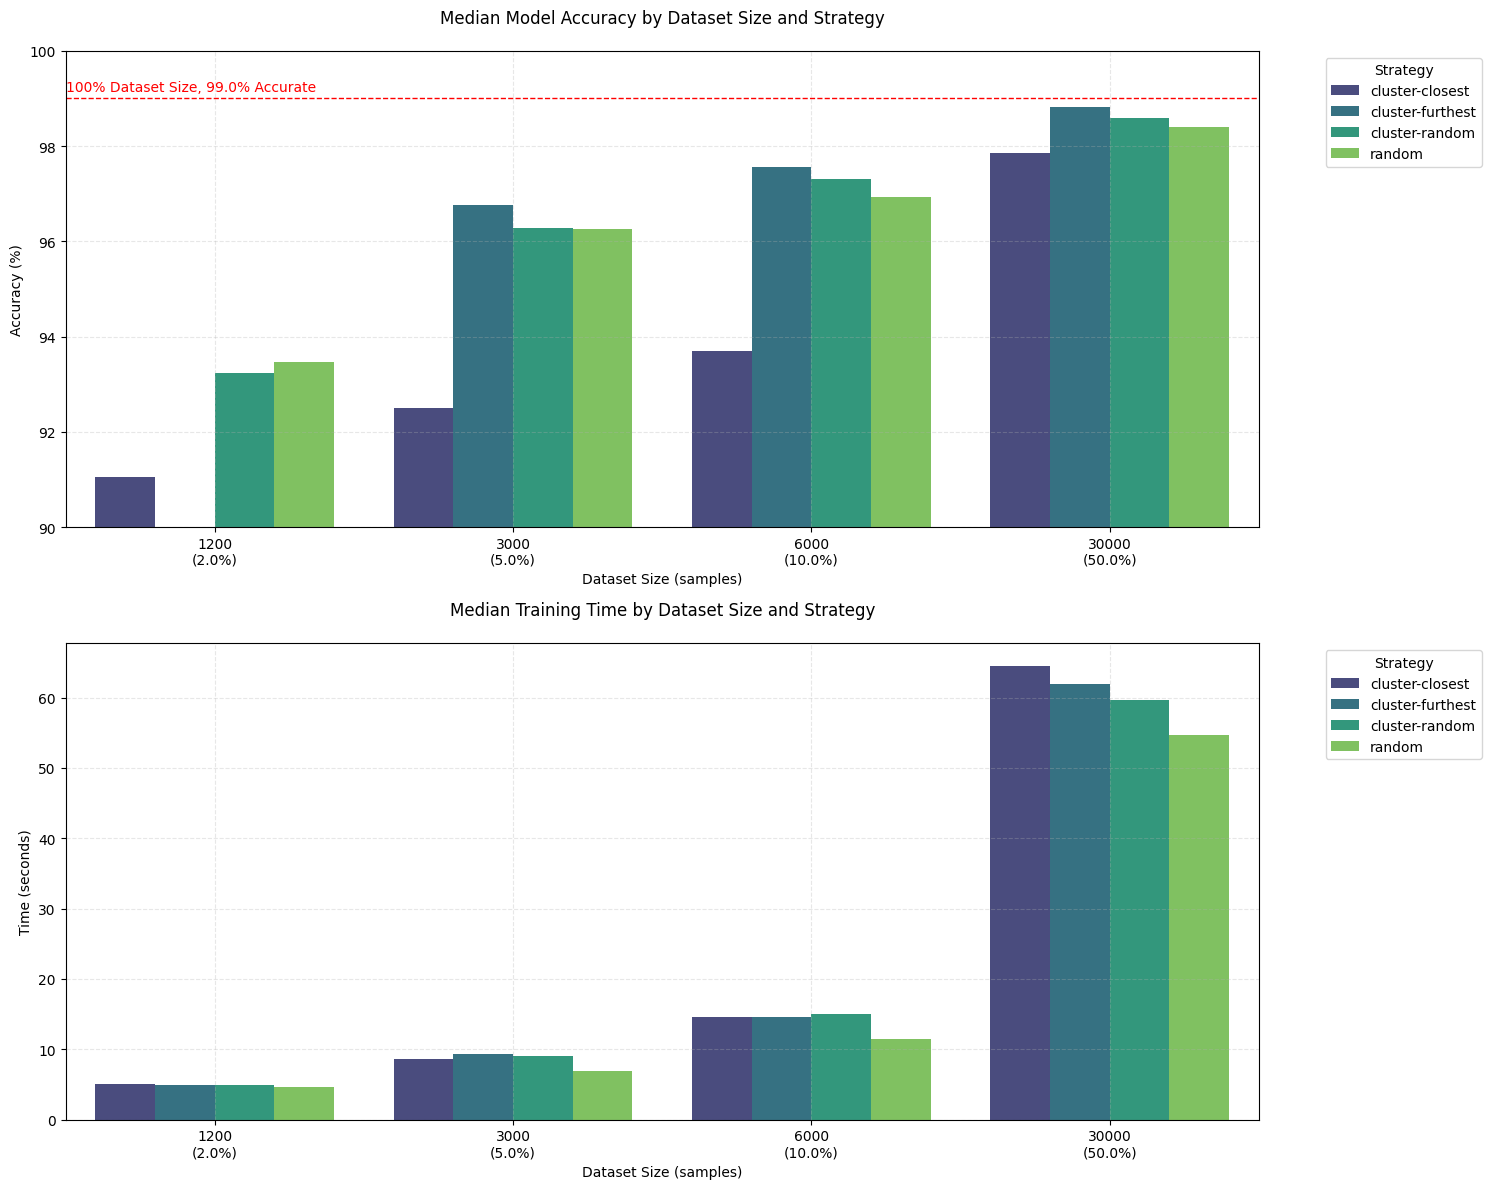

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_detailed_plots(csv_file):
    df = pd.read_csv(csv_file)
    
    # Filter out 1% data and combine strategy names
    df = df[df['dataset_size'] > 600]
    df['strategy'] = df.apply(
        lambda x: f"{x['pruning_method']}-{x['selection_strategy']}" if pd.notna(x['selection_strategy']) 
        else x['pruning_method'], axis=1
    )
    
    # Calculate medians
    results = df.groupby(['dataset_size', 'strategy'])[['accuracy', 'time']].median().reset_index()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Accuracy
    sns.barplot(
        data=results,
        x='dataset_size',
        y='accuracy',
        hue='strategy',
        ax=ax1,
        palette='viridis'
    )
    
    ax1.axhline(y=99.0, color='red', linestyle='--', linewidth=1)
    ax1.text(
        -0.5,  # x position (slightly left of the first bar)
        99.1,  # y position (slightly above the line)
        '100% Dataset Size, 99.0% Accurate',
        color='red',
        fontsize=10,
        verticalalignment='bottom'
    )
    
    ax1.set_title('Median Model Accuracy by Dataset Size and Strategy', pad=20)
    ax1.set_xlabel('Dataset Size (samples)')
    ax1.set_ylabel('Accuracy (%)')
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_ylim(90, 100)  # Focus on the relevant accuracy range
    
    # Plot 2: Time
    sns.barplot(
        data=results,
        x='dataset_size',
        y='time',
        hue='strategy',
        ax=ax2,
        palette='viridis'
    )
    
    ax2.set_title('Median Training Time by Dataset Size and Strategy', pad=20)
    ax2.set_xlabel('Dataset Size (samples)')
    ax2.set_ylabel('Time (seconds)')
    ax2.grid(True, linestyle='--', alpha=0.3)

    ax2.axhline(y=99.5, color='red', linestyle='--', linewidth=1)
    ax2.text(
        -0.5,  # x position (slightly left of the first bar)
        99.1,  # y position (slightly above the line)
        '100% Dataset Size, 99.5s Training Time',
        color='red',
        fontsize=10,
        verticalalignment='bottom'
    )
    
    # Format x-axis labels
    for ax in [ax1, ax2]:
        ax.set_xticklabels([f'{size}\n({size/60000*100:.1f}%)' for size in sorted(results['dataset_size'].unique())])
        ax.legend(title='Strategy', bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    return fig

# Usage:
figure = create_detailed_plots('results/experiment_results_20250123_074031.csv')
plt.show()
# figure.savefig('detailed_results.png', dpi=300, bbox_inches='tight')

/var/folders/df/nf3r4lm93rbf2zr46sdq3mkc0000gp/T/ipykernel_27756/3001228869.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{size}\n({size/60000*100:.1f}%)' for size in sorted(results['dataset_size'].unique())])
/var/folders/df/nf3r4lm93rbf2zr46sdq3mkc0000gp/T/ipykernel_27756/3001228869.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{size}\n({size/60000*100:.1f}%)' for size in sorted(results['dataset_size'].unique())])


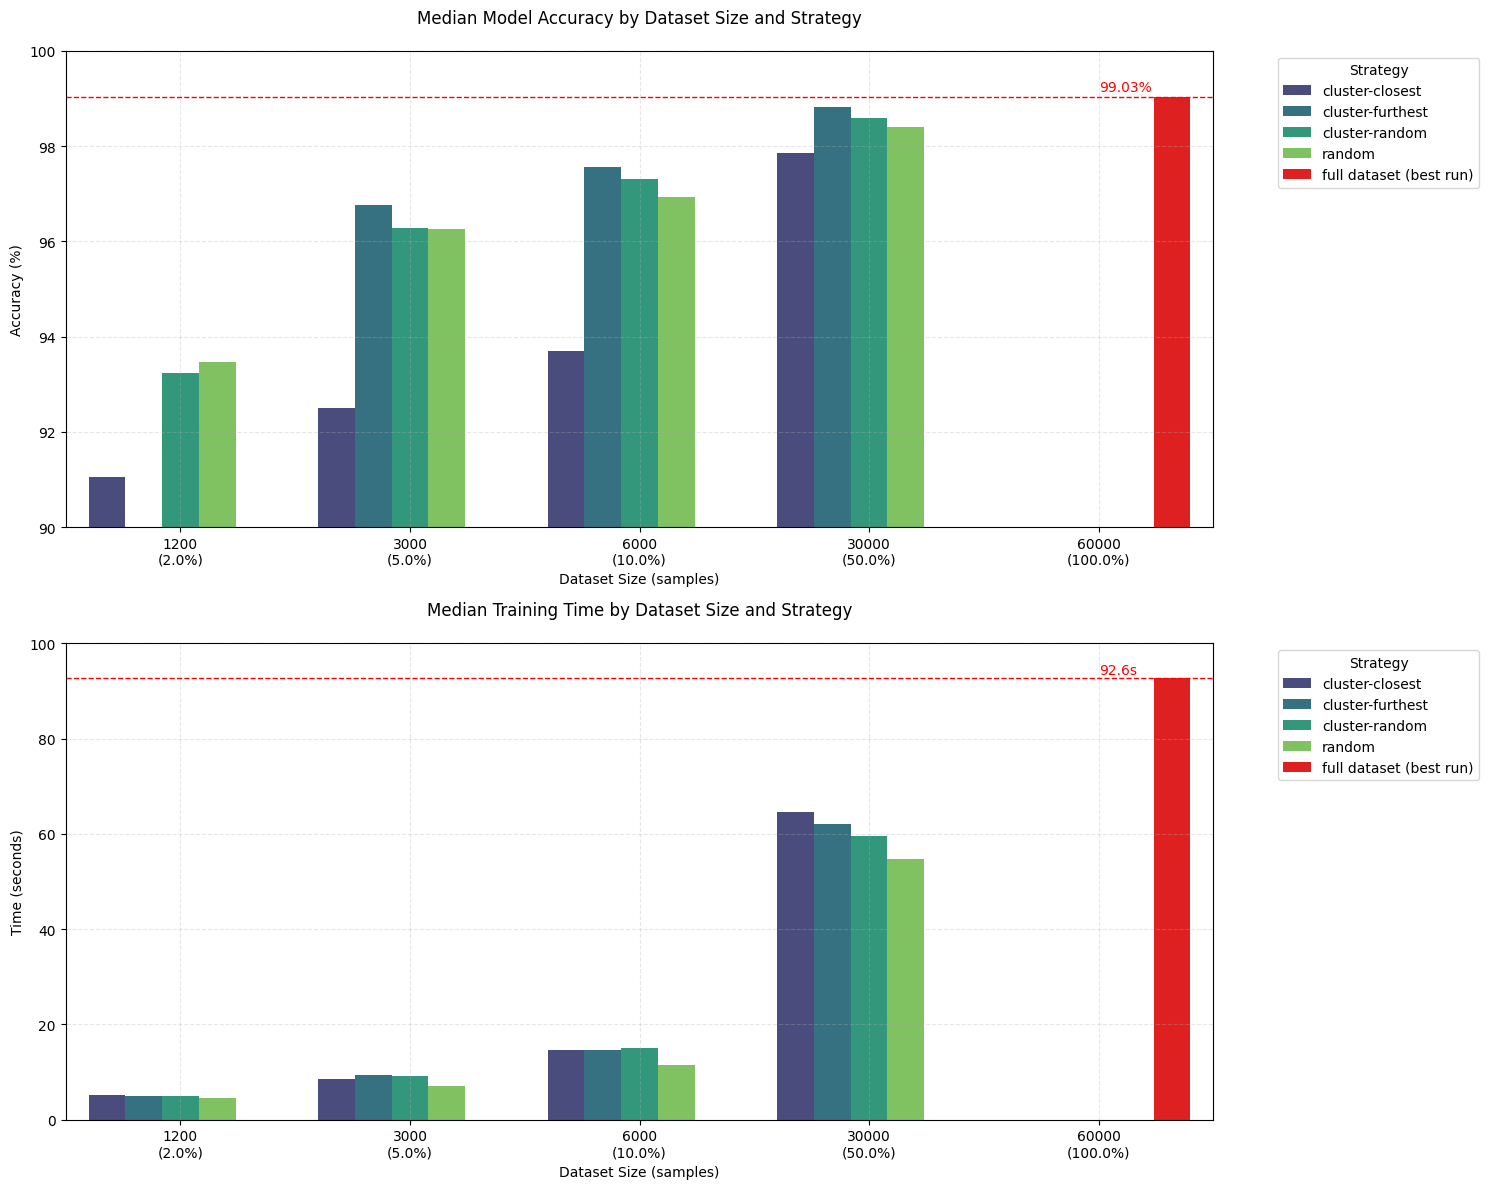

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def create_detailed_plots(csv_file):
    df = pd.read_csv(csv_file)
    
    # Filter out 1% data and combine strategy names
    df = df[df['dataset_size'] > 600]
    df['strategy'] = df.apply(
        lambda x: f"{x['pruning_method']}-{x['selection_strategy']}" if pd.notna(x['selection_strategy']) 
        else x['pruning_method'], axis=1
    )
    
    # Calculate medians
    results = df.groupby(['dataset_size', 'strategy'])[['accuracy', 'time']].median().reset_index()
    
    # Add full dataset row - best run for each
    full_dataset_row = pd.DataFrame({
        'dataset_size': [60000],
        'strategy': ['full dataset (best run)'],
        'accuracy': [99.03],
        'time': [92.61]
    })
    results = pd.concat([results, full_dataset_row], ignore_index=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Create custom palette with an additional color for full dataset
    n_strategies = len(results['strategy'].unique()) - 1  # subtract 1 for full dataset
    palette = dict(zip(
        results['strategy'].unique(),
        list(sns.color_palette('viridis', n_strategies)) + ['red']  # Add red for full dataset
    ))
    
    # Plot 1: Accuracy
    sns.barplot(
        data=results,
        x='dataset_size',
        y='accuracy',
        hue='strategy',
        ax=ax1,
        palette=palette
    )
    
    ax1.set_title('Median Model Accuracy by Dataset Size and Strategy', pad=20)
    ax1.set_xlabel('Dataset Size (samples)')
    ax1.set_ylabel('Accuracy (%)')
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_ylim(90, 100)  # Focus on the relevant accuracy range
    
    # Plot 2: Time
    sns.barplot(
        data=results,
        x='dataset_size',
        y='time',
        hue='strategy',
        ax=ax2,
        palette=palette
    )
    
    ax2.set_title('Median Training Time by Dataset Size and Strategy', pad=20)
    ax2.set_xlabel('Dataset Size (samples)')
    ax2.set_ylabel('Time (seconds)')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_ylim(0, 100)  # Focus on the relevant time range

    ax1.axhline(y=99.03, color='red', linestyle='--', linewidth=1)
    ax1.text(
        4,  # x position (slightly left of the first bar)
        99.1,  # y position (slightly above the line)
        '99.03%',
        color='red',
        fontsize=10,
        verticalalignment='bottom'
    )

    ax2.axhline(y=92.61, color='red', linestyle='--', linewidth=1)
    ax2.text(
        4,  # x position (slightly left of the first bar)
        92.9,  # y position (slightly above the line)
        '92.6s',
        color='red',
        fontsize=10,
        verticalalignment='bottom'
    )
    
    # Format x-axis labels
    for ax in [ax1, ax2]:
        ax.set_xticklabels([f'{size}\n({size/60000*100:.1f}%)' for size in sorted(results['dataset_size'].unique())])
        ax.legend(title='Strategy', bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    return fig
# Usage:
figure = create_detailed_plots('results/experiment_results_20250123_074031.csv')
plt.show()
# figure.savefig('detailed_results.png', dpi=300, bbox_inches='tight')

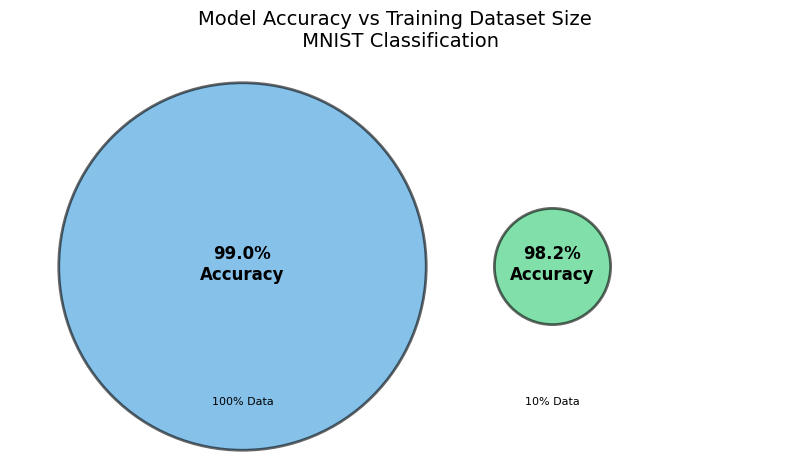

In [38]:
import matplotlib.pyplot as plt

def create_side_by_side_bubbles():
    plt.figure(figsize=(10, 5))
    
    # Remove all axes and grid
    ax = plt.gca()
    ax.set_axis_off()
    
    # Create two bubbles
    plt.scatter([0.3, 0.7], [0.5, 0.5], 
                s=[70000, 7000],  # Size difference more dramatic
                c=['#3498db', '#2ecc71'],  # Blue and green
                alpha=0.6,
                edgecolor='black',
                linewidth=2)
    
    # Add center points
    # plt.scatter([0.3, 0.7], [0.5, 0.5],
    #             c='white',
    #             s=100,
    #             zorder=3,
    #             edgecolor='black',
    #             linewidth=2)
    
    # Add labels
    plt.annotate('98.2%\nAccuracy', 
                (0.7, 0.5),
                xytext=(0, -12),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=12,
                weight='bold')
                # bbox=dict(facecolor='white', edgecolor='black', pad=5))
    plt.annotate('99.0%\nAccuracy', 
                (0.3, 0.5),
                xytext=(0, -12),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=12,
                weight='bold')
                # bbox=dict(facecolor='white', edgecolor='black', pad=5))
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title('Model Accuracy vs Training Dataset Size \n MNIST Classification', 
              fontsize=14, pad=20)
    # plt.suptitle('Achieving 98.2% accuracy with just 10% of the data',
    #             fontsize=10, y=0.92, style='italic')

    # Add lines and bottom labels
    # plt.plot([0.3, 0.3], [0.35, 0.2], 'k--', linewidth=1)
    # plt.plot([0.7, 0.7], [0.35, 0.2], 'k--', linewidth=1)

    plt.annotate('100% Data', 
            (0.3, 0.15),
            ha='center',
            va='center',
            fontsize=8)

    plt.annotate('10% Data', 
            (0.7, 0.15),
            ha='center',
            va='center',
            fontsize=8)
    return plt.gcf()

figure = create_side_by_side_bubbles()
plt.show()
# figure.savefig('simple_comparison.png', dpi=300, bbox_inches='tight')

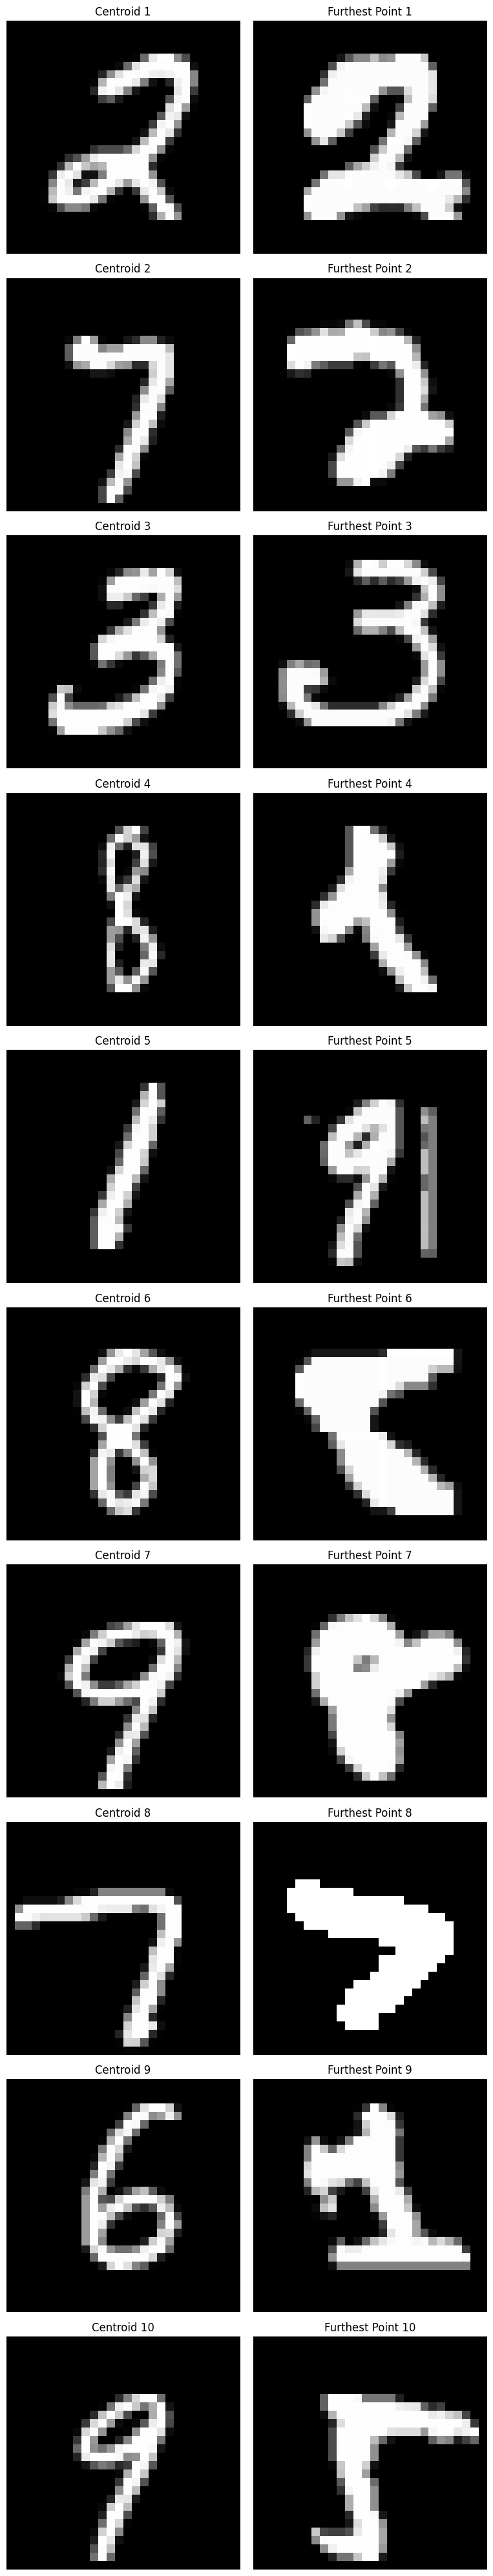

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST('data', train=True, download=True, transform=transform)
X_train = mnist_train.data.numpy().reshape(60000, -1)

# Load your saved arrays  
centroids = np.load('closest_indices.npy')
furthest_indices = np.load('furthest_indices.npy')

n_clusters = len(centroids)  # Or however many you want to show
n_clusters=10
fig, axes = plt.subplots(n_clusters, 2, figsize=(8, 4*n_clusters))

for i in range(n_clusters):
   # Plot centroid
   axes[i,0].imshow(X_train[centroids[i]].reshape(28, 28), cmap='gray')
   axes[i,0].set_title(f'Centroid {i+1}')
   axes[i,0].axis('off')
   
   # Plot furthest point
   axes[i,1].imshow(X_train[furthest_indices[i]].reshape(28, 28), cmap='gray')
   axes[i,1].set_title(f'Furthest Point {i+1}')
   axes[i,1].axis('off')

plt.tight_layout()
plt.show()